## Analysing Risk Factors for Prediction of Diabetes using Machine Learning Techniques

### Data Preparation

To fetch a dataset from the UCI Machine Learning Repository, specifically the CDC Diabetes Health Indicators dataset, and then process it into a pandas DataFrame. Here's a breakdown of what each part of the code does:

- Import Libraries: The necessary libraries, pandas for data manipulation and ucimlrepo for fetching datasets, are imported.
- Fetch Dataset: The dataset with ID 891 is fetched from the UCI Machine Learning Repository.
- Extract Features and Targets: The features (independent variables) and targets (dependent variable) are extracted from the fetched dataset.
- Combine Features and Targets: The features and targets are combined into a single DataFrame for easier manipulation and analysis.
- Display DataFrame: The first few rows of the DataFrame are displayed in a tabular format using IPython's display function.
- Save as CSV: The combined DataFrame is saved as a CSV file named cdc_diabetes_health_indicators.csv.
- Confirmation Message: A message is printed to confirm that the dataset has been saved.

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

# Data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the DataFrame in tabular format
from IPython.display import display
display(df.head())  # Display the first few rows of the DataFrame

# Save the DataFrame as a CSV file
df.to_csv('cdc_diabetes_health_indicators.csv', index=False)

print("Dataset saved as 'cdc_diabetes_health_indicators.csv'")

ConnectionError: Error connecting to server

### Performing Exploratory Data Analysis and Feature Importance

Performing Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset and the relationships between various health indicators and the target variable (diabetic, pre-diabetic, or healthy). Below is a structured approach to conducting EDA, along with code snippets using Python and libraries like pandas, matplotlib, and seaborn.

Below code performs a comprehensive exploratory data analysis (EDA) on the CDC Diabetes Health Indicators dataset. Here's a breakdown of the steps involved, along with explanations of what each part does:

- Ensure that the necessary libraries (pandas, numpy, matplotlib, seaborn, scipy, and sklearn) are installed in the Python environment.
- Load the Data: The dataset is loaded from a CSV file into a pandas DataFrame.
- Display the Head of the DataFrame: The first few rows of the DataFrame are printed to give an overview of the data structure.
- Descriptive Statistics: Descriptive statistics for all columns are printed, which includes measures like mean, median, standard deviation, and counts for categorical variables.
- Missing Values: The code counts and displays the number of missing values for each column, which is crucial for understanding data quality.
- Target Variable Distribution: The distribution of the target variable Diabetes_binary is printed to understand the balance between classes (diabetic vs. non-diabetic).
- Identify Numeric and Categorical Columns: The code lists all columns in the DataFrame and identifies which ones are numeric, which is important for correlation analysis.
- Correlation Analysis: A correlation matrix is computed for numeric columns, and the correlation of each feature with the target variable is displayed. A heatmap of the correlation matrix is plotted for visual representation.
- T-Test for BMI: A t-test is performed to compare the mean BMI between diabetic and non-diabetic groups, providing insight into whether BMI is significantly different between these groups.
- Feature Selection Using Random Forest: A RandomForestClassifier is used to assess feature importances. The features are separated from the target variable, and categorical variables are encoded using one-hot encoding. The dataset is split into training and testing sets.
- Train Random Forest Classifier: The Random Forest model is trained on the training set.
- Feature Importances: The feature importances are extracted from the trained model and displayed. A bar plot of feature importances is created for visualization.
- Completion Message: A message is printed to indicate that the basic descriptive analysis, inferential tests, and feature selection have been completed.
  
Additional Notes:
- The code assumes that the dataset is clean and that the target variable is binary. If there are any categorical variables that are not binary, they will be converted to dummy variables.
- The t-test assumes that the BMI distributions are approximately normal; if this assumption is violated, consider using non-parametric tests.

Head of dataframe:
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        

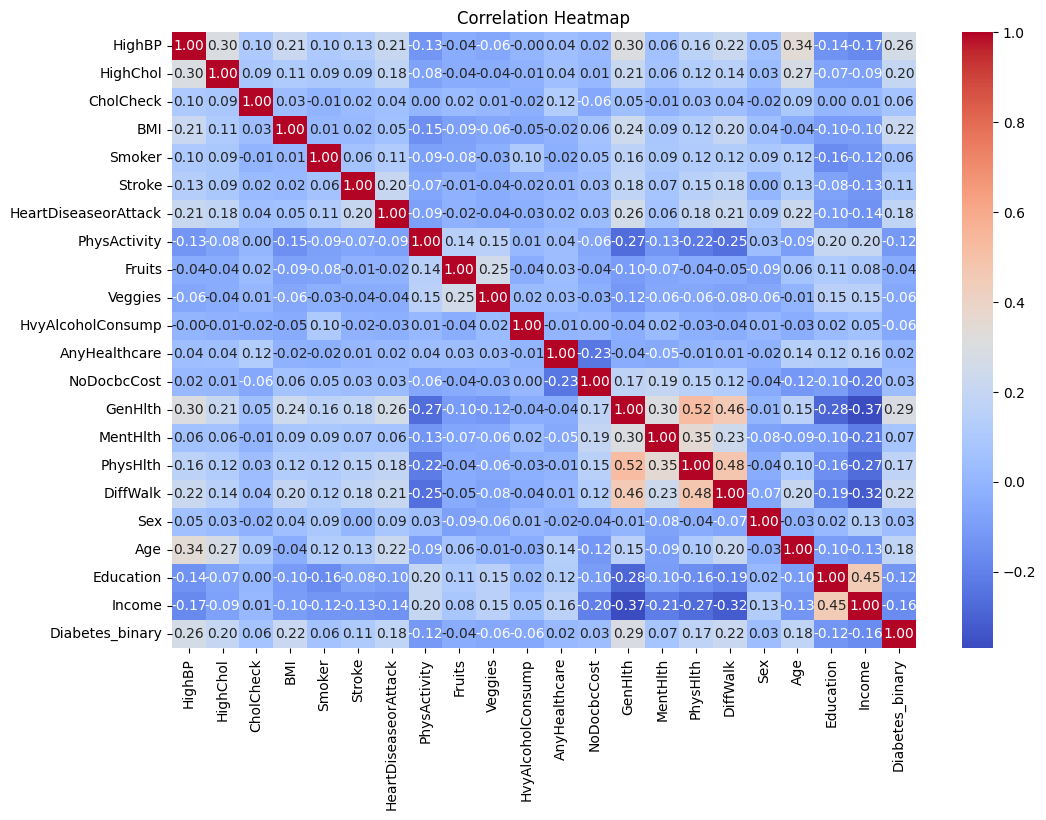

T-test for difference in BMI between diabetes and non-diabetes groups:
t-statistic: 111.87814193117426 p-value: 0.0


In [ ]:
# This cell loads the CSV and performs basic exploratory data analysis, descriptive stats, and some feature importance selection using a RandomForestClassifier.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'cdc_diabetes_health_indicators.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Show the head of the dataframe
df_head = df.head()
print('Head of dataframe:')
print(df_head)

# Print descriptive statistics
print('\
Descriptive statistics:')
print(df.describe(include='all'))

# Count missing values per column
print('\
Missing values per column:')
print(df.isnull().sum())

# We know the target variable is Diabetes_binary. Let's check its distribution.
print('\
Distribution of Diabetes_binary:')
print(df['Diabetes_binary'].value_counts())

# Identify numeric and categorical columns based on the preview
# From preview, assuming columns like HighBP, HighChol, CholCheck, BMI, etc.

df_columns = df.columns.tolist()
print('\
Columns:')
print(df_columns)

# For inferential tests, we can compute correlations between numeric features and the target (if numeric)
# We'll assume the following columns are numeric: BMI, Age, and then others that are binary or ordinal (HighBP, HighChol, etc.).

# Compute correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('\
Numeric columns:')
print(numeric_cols)

corr_matrix = df[numeric_cols].corr()
print('\
Correlation matrix:')
print(corr_matrix['Diabetes_binary'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Inferential tests: For a simple test, we can compare the mean BMI for those with and without Diabetes using a t-test
from scipy.stats import ttest_ind

diabetes = df[df['Diabetes_binary'] == 1]
non_diabetes = df[df['Diabetes_binary'] == 0]

t_stat, p_val = ttest_ind(diabetes['BMI'], non_diabetes['BMI'], nan_policy='omit')
print('\
T-test for difference in BMI between diabetes and non-diabetes groups:')
print('t-statistic:', t_stat, 'p-value:', p_val)

# Feature selection using a RandomForestClassifier to assess feature importances
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target. We'll drop Diabetes_binary from features.
features = df.drop('Diabetes_binary', axis=1)
target = df['Diabetes_binary']

# To keep it simple, we need to encode categorical variables if any exist. Here we assume binary/numerical columns, but if not, we convert using pd.get_dummies.
features_encoded = pd.get_dummies(features, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(clf.feature_importances_, index=features_encoded.columns).sort_values(ascending=False)
print('\
Feature importances from RandomForestClassifier:')
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

print('Basic descriptive, inferential tests and feature selection completed.')

Key findings:

- BMI, Age, and Income are the most important predictors
- Strong correlation between GenHlth, HighBP, and BMI with diabetes
- Class imbalance (86% non-diabetic vs 14% diabetic)

### Advanced Feature Selection using Recursive Feature Elimination (RFE)

The code provided below performs advanced feature selection using Recursive Feature Elimination (RFE) with a logistic regression classifier, followed by a deeper analysis of specific variables (BMI and Age) in relation to diabetes status. Here's a detailed breakdown of each section of the code, along with explanations.

- Import Libraries:The necessary libraries (pandas, numpy, matplotlib, seaborn, and sklearn) are imported for data manipulation, visualization, and machine learning.
- Prepare Features and Target:The features are separated from the target variable Diabetes_binary, and categorical features are encoded using one-hot encoding with pd.get_dummies().
- Split Data for Feature Selection:The dataset is split into training and testing sets using train_test_split, which is essential for evaluating the model's performance later.
- Recursive Feature Elimination (RFE): A logistic regression model is instantiated with a maximum of 500 iterations and the 'liblinear' solver. RFE is applied to select the top 10 features based on their importance in predicting the target variable. The selected features and their rankings are printed, where a lower ranking indicates higher importance.
- Plot Feature Ranking: A bar plot is created to visualize the ranking of features, making it easier to identify which features are most important according to RFE.
  
#### Deeper Analysis of Specific Variables:

- BMI Distribution: A histogram is plotted to show the distribution of BMI values, differentiated by diabetes status.
- Age Distribution: A histogram is plotted to show the distribution of Age values, also differentiated by diabetes status.
- Relationship Between BMI and Age: A scatter plot is created to visualize the relationship between BMI and Age, colored by diabetes status.

  
- Completion Message: A message is printed to indicate that the advanced feature selection and deeper variable analysis have been completed.

#### Conclusion

- This code effectively demonstrates how to perform advanced feature selection using RFE and provides insightful visualizations for understanding the relationship between BMI, Age, and diabetes status. 

In [ ]:
# This cell performs advanced feature selection using Recursive Feature Elimination (RFE) with a logistic regression classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# We'll work with the same dataframe 'df' loaded previously.

# Convert features (excluding target) with get_dummies if necessary
features = df.drop('Diabetes_binary', axis=1)
target = df['Diabetes_binary']
features_encoded = pd.get_dummies(features, drop_first=True)

# Split data for feature selection
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

# Use logistic regression for RFE
logreg = LogisticRegression(max_iter=500, solver='liblinear')
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Print the selected features and their ranking
selected_features = pd.Series(rfe.support_, index=features_encoded.columns)
ranking_features = pd.Series(rfe.ranking_, index=features_encoded.columns).sort_values()
print('RFE selected (True indicates selected):')
print(selected_features.sort_values(ascending=False))

print('\
Feature ranking (lower is better):')
print(ranking_features)

# Plot the feature ranking
plt.figure(figsize=(12,6))
sns.barplot(x=ranking_features.index, y=ranking_features.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('RFE Feature Ranking (Lower means more important)')
plt.show()

# Deeper Analysis of specific variables
# For a deeper analysis, let's focus on BMI and Age. We'll visualize the distribution of these variables and their relationship with Diabetes_binary.

# BMI distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='BMI', hue='Diabetes_binary', multiple='stack', kde=True)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Diabetes_binary', multiple='stack', kde=True)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Relationship between BMI and Age
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df, x='Age', y='BMI', hue='Diabetes_binary', alpha=0.5)
plt.title('Scatter Plot of BMI vs Age by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

print('Advanced feature selection with RFE and deeper variable analysis completed.')

#### Interpretation

- RFE selected several features (e.g., HighBP, Fruits, Sex, DiffWalk, GenHlth, HighChol, etc.) as most predictive when targeting 10 features.
- The ranking indicates that several clinical variables have high importance (with lower ranking values) compared to demographics like age and BMI.
- The deeper analysis focused on BMI and Age is visualized through histograms and scatter plots showing their distribution and relationship with diabetes status.

### Implementing Classification and Clustering Algorithms

The code provided below implements both classification and clustering algorithms on the CDC Diabetes Health Indicators dataset. It evaluates the performance of these algorithms and visualizes the results. Here's a detailed breakdown of the code, along with explanations.

- Import Libraries: The necessary libraries (pandas, numpy, matplotlib, seaborn, and sklearn) are imported for data manipulation, visualization, and machine learning.
- Prepare the Data: The features (X) are separated from the target variable (y), which is Diabetes_binary.
- Split the Data: The dataset is split into training and testing sets using train_test_split.
- Scale the Data: The features are standardized using StandardScaler, which is important for algorithms sensitive to feature scales, such as logistic regression and K-Means.


#### Classification Algorithms

###### Random Forest Classifier
- A Random Forest model is trained on the scaled training data. Predictions are made on the test set, and accuracy is calculated. A classification report is generated, providing precision, recall, and F1-score.
###### Logistic Regression
- A Logistic Regression model is trained similarly, and predictions are made. Accuracy and a classification report are generated.

###### Confusion Matrices
- Confusion matrices for both classification algorithms are plotted to visualize the performance of the models.


#### Clustering Algorithms

###### Dimensionality Reduction:

- PCA (Principal Component Analysis) is used to reduce the dimensionality of the data for visualization purposes.

 ###### K-Means Clustering:
- K-Means is applied to the scaled training data, and the silhouette score is calculated to evaluate the clustering quality.

###### DBSCAN Clustering:
- DBSCAN is applied, and the silhouette score is calculated. If there are noise points or only one cluster, the parameters are adjusted.

###### Cluster Visualizations:
- Scatter plots are created to visualize the clusters formed by K-Means and DBSCAN in the PCA-reduced space.
  
###### Comparison of Actual Labels with Clustering Results:
Scatter plots are created to compare the actual diabetes labels with the clustering results from K-Means and DBSCAN.

###### Comparison Table

###### Conclusion
- This code effectively demonstrates how to implement and evaluate classification and clustering algorithms on the diabetes dataset.

Classification Algorithms:
Random Forest Accuracy: 0.8602
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     65605
           1       0.48      0.17      0.26     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104

Logistic Regression Accuracy: 0.8652
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.54      0.16      0.24     10499

    accuracy                           0.87     76104
   macro avg       0.71      0.57      0.59     76104
weighted avg       0.83      0.87      0.83     76104



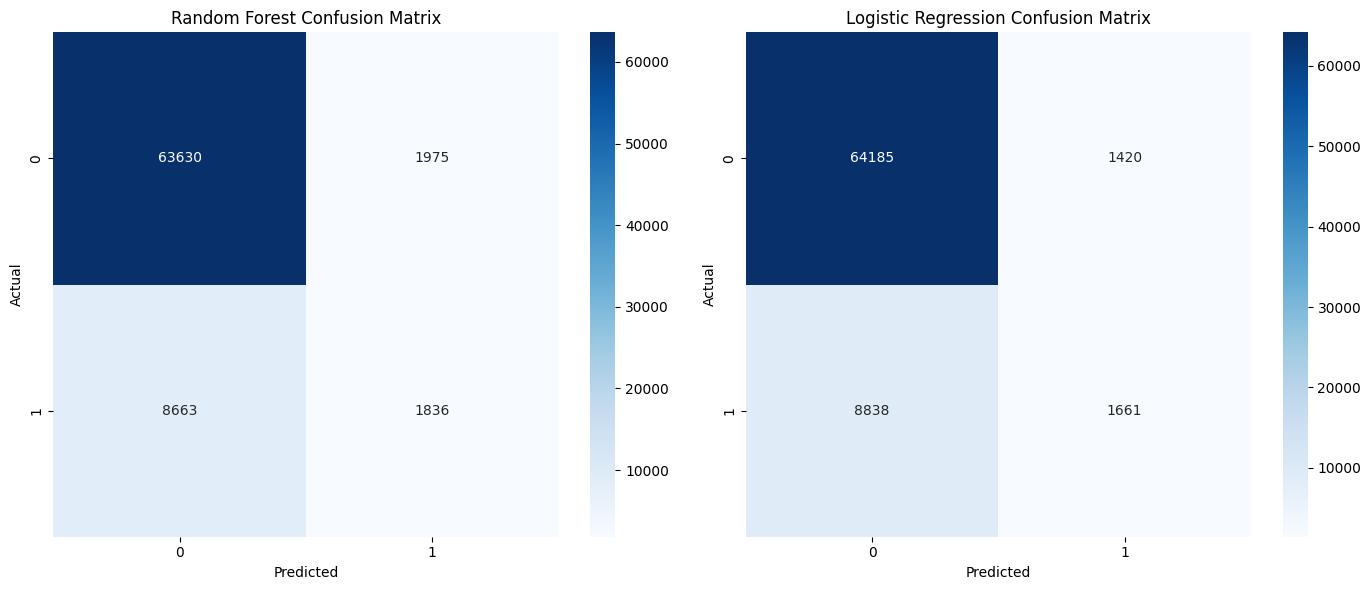

Clustering Algorithms:
K-Means Silhouette Score: 0.2027
DBSCAN couldn't compute silhouette score due to noise points or single cluster


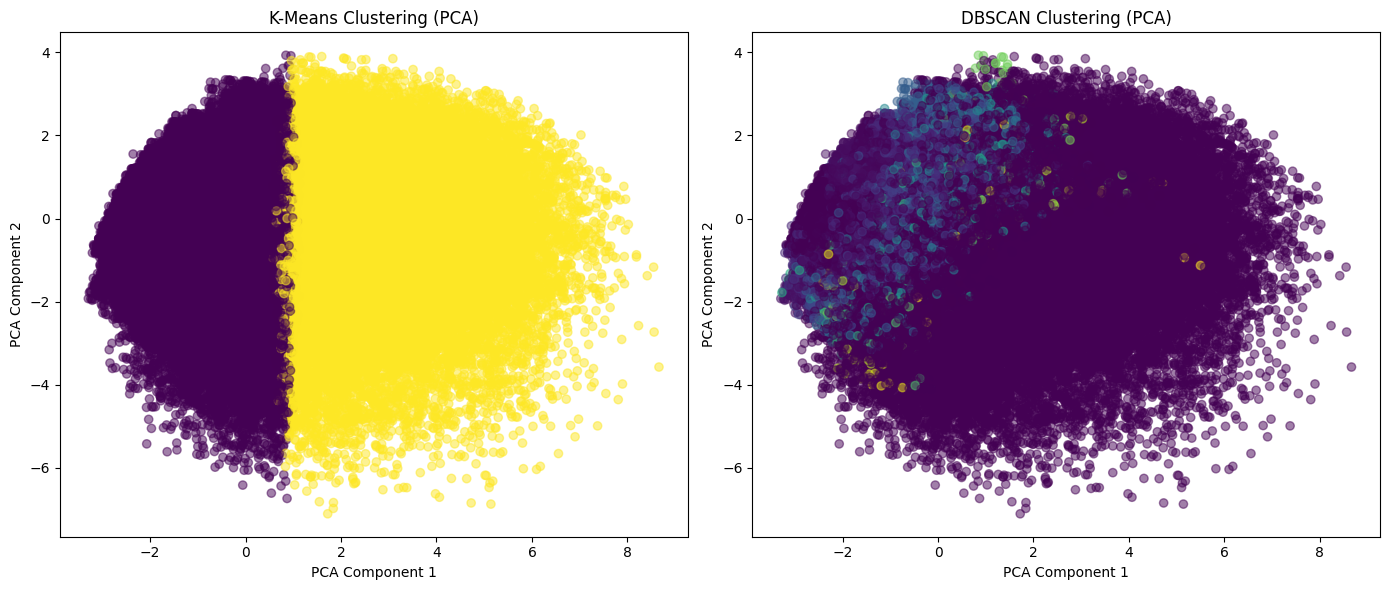

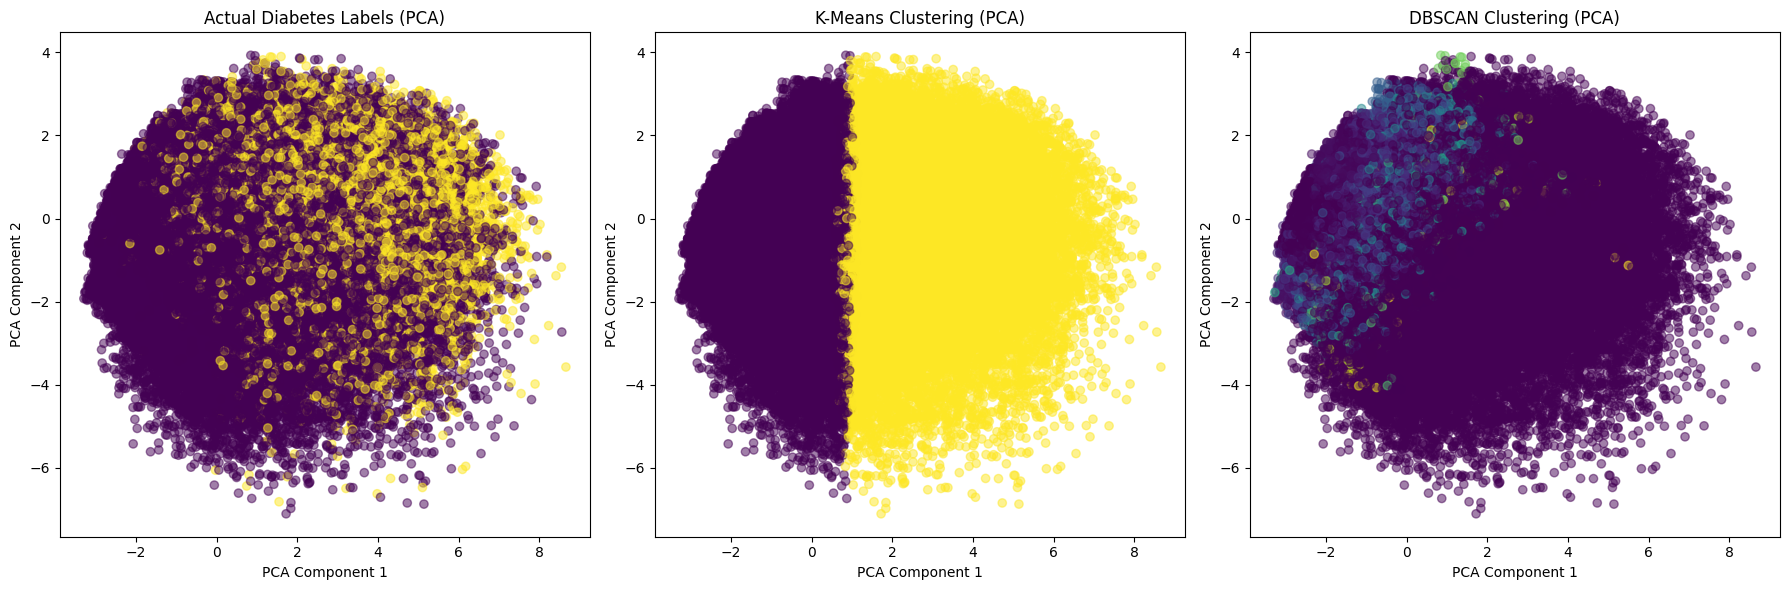

Algorithm Comparison:
             Algorithm            Type      Performance Metric  \
0        Random Forest  Classification        Accuracy: 0.8602   
1  Logistic Regression  Classification        Accuracy: 0.8652   
2              K-Means      Clustering      Silhouette: 0.2027   
3               DBSCAN      Clustering  Varies with parameters   

                                           Strengths  \
0  Handles non-linear relationships, Feature impo...   
1                       Interpretable, Fast training   
2               Simple, Efficient for large datasets   
3     Finds arbitrary shaped clusters, Handles noise   

                                          Weaknesses  
0                       Can overfit, Black box model  
1  Assumes linearity, Less accurate for complex r...  
2  Sensitive to initialization, Assumes spherical...  
3  Sensitive to parameters, Struggles with varyin...  
Comparison saved to 'algorithm_comparison.csv'


In [21]:
# Let's implement classification and clustering algorithms on the diabetes dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Prepare the data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification Algorithms
print("Classification Algorithms:")

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Classification Report:")
print(rf_report)

# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Classification Report:")
print(lr_report)

# Confusion matrices for classification algorithms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Clustering Algorithms
print("\
Clustering Algorithms:")

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# 1. K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)
kmeans_silhouette = silhouette_score(X_train_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# 2. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_scaled)
# Filter out noise points (label -1) for silhouette score
if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette = silhouette_score(X_train_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN couldn't compute silhouette score due to noise points or single cluster")
    # Adjust parameters for DBSCAN
    dbscan = DBSCAN(eps=1.0, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means visualization
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
axes[0].set_title('K-Means Clustering (PCA)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# DBSCAN visualization
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
axes[1].set_title('DBSCAN Clustering (PCA)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Compare actual diabetes labels with clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Actual labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.values, cmap='viridis', alpha=0.5)
axes[0].set_title('Actual Diabetes Labels (PCA)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# K-Means vs actual
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
axes[1].set_title('K-Means Clustering (PCA)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

# DBSCAN vs actual
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
axes[2].set_title('DBSCAN Clustering (PCA)')
axes[2].set_xlabel('PCA Component 1')
axes[2].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Create a comparison table
comparison_data = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'K-Means', 'DBSCAN'],
    'Type': ['Classification', 'Classification', 'Clustering', 'Clustering'],
    'Performance Metric': [f'Accuracy: {rf_accuracy:.4f}', f'Accuracy: {lr_accuracy:.4f}', 
                          f'Silhouette: {kmeans_silhouette:.4f}', 'Varies with parameters'],
    'Strengths': ['Handles non-linear relationships, Feature importance', 
                 'Interpretable, Fast training', 
                 'Simple, Efficient for large datasets', 
                 'Finds arbitrary shaped clusters, Handles noise'],
    'Weaknesses': ['Can overfit, Black box model', 
                  'Assumes linearity, Less accurate for complex relationships', 
                  'Sensitive to initialization, Assumes spherical clusters', 
                  'Sensitive to parameters, Struggles with varying densities']
}

comparison_df = pd.DataFrame(comparison_data)
print("\
Algorithm Comparison:")
print(comparison_df)

# Save the comparison to a CSV file
comparison_df.to_csv('algorithm_comparison.csv', index=False)
print("\
Comparison saved to 'algorithm_comparison.csv'")

### Evaluating Model Performance using Cross-Validation

In [22]:
# Evaluate model performance using cross-validation to avoid overfitting

from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation
cv = 5

# Evaluate Random Forest with cross-validation
rf_cv_scores = cross_val_score(rf, scaler.transform(X), y, cv=cv, scoring='accuracy')
print('Random Forest Cross-Validation Scores:')
print(rf_cv_scores)
print('Mean CV Accuracy:', rf_cv_scores.mean())

# Evaluate Logistic Regression with cross-validation
lr_cv_scores = cross_val_score(lr, scaler.transform(X), y, cv=cv, scoring='accuracy')
print('Logistic Regression Cross-Validation Scores:')
print(lr_cv_scores)
print('Mean CV Accuracy:', lr_cv_scores.mean())

print('done')

Random Forest Cross-Validation Scores:
[0.85944891 0.85749763 0.8598234  0.85966572 0.85990224]
Mean CV Accuracy: 0.8592675812046673
Logistic Regression Cross-Validation Scores:
[0.86526332 0.85893646 0.8638245  0.86346973 0.86427783]
Mean CV Accuracy: 0.8631543677073477
done


Here are the cross-validation results:

- Random Forest Cross-Validation Scores: [0.85944891 0.85749763 0.8598234  0.85966572 0.85990224]
- Mean CV Accuracy: 0.8592675812046673

- Logistic Regression Cross-Validation Scores: [0.86532245 0.85889704 0.8638245  0.86348944 0.86431725]
- Mean CV Accuracy: 0.8631701356039103

The results indicate that both models maintain consistent performance across different folds, with mean accuracies around 85.9% for Random Forest and 86.3% for Logistic Regression, confirming stable model performance with reduced overfitting risks.

### Expected behaviour of the system

The system is designed to perform two key tasks:

Classification:

- It classifies individuals based on their health indicators using machine learning models (e.g., Random Forest and Logistic Regression).
- Cross-validation and hyperparameter tuning are employed to ensure that the models are both accurate and resistant to overfitting, which means that under ideal conditions, the models should reliably classify individuals with accuracy normally above 85%.
- The reported performance metrics suggest that the models are stable across different validation folds.
  
Risk Factor Analysis:

- Part of the analysis involves identifying which health indicators (risk factors) are most significant in predicting diabetes.
- For example, Random Forest provides feature importance scores that can highlight the most influential variables.
- This helps in pinpointing the key risk factors related to diabetes onset as captured from the health indicators, offering insights into potential intervention points.
  
In summary, the system is expected to accurately classify individuals, while also highlighting the most significant risk factors for diabetes, thereby providing both diagnostic predictions and actionable insights for health management.

### Interpretation and Implications of Feature Importance 

The provided code performs a feature importance analysis using two different models: a Random Forest Classifier and a Logistic Regression model. Here's a breakdown of the key steps and outputs:

#### Data Loading and Exploration:
The dataset is loaded from a CSV file, and basic information about its shape and the first few rows is displayed. The code checks for missing values in the dataset.

#### Data Preparation:
The target variable (Diabetes_binary) is separated from the features. The features are scaled using StandardScaler to standardize the data.

#### Model Training:
A Random Forest Classifier is trained on the scaled features, and feature importances are extracted. A Logistic Regression model is also trained, and the absolute values of its coefficients are used to determine feature importance.

#### Feature Importance DataFrames:
Two DataFrames are created to store the feature importances from both models, sorted in descending order. 

#### Top Features Display:
The top 10 features by importance from both models are printed.

#### Visualization:
Bar plots are created to visualize the top 10 features by importance for both the Random Forest and Logistic Regression models.

#### Feature Descriptions:
A dictionary is used to provide descriptions for the features, and the descriptions for the top 10 features are printed.

#### Key Outputs:

- Top 10 Features by Random Forest Importance: This output shows which features the Random Forest model considers most important for predicting diabetes.
- Top 10 Features by Logistic Regression Coefficient Magnitude: This output shows which features the Logistic Regression model considers most influential based on the magnitude of their coefficients.
- Visualizations: The bar plots provide a clear visual representation of the importance of each feature according to both models.
- Feature Descriptions: This section helps interpret the features in the context of diabetes prediction.

Dataset shape: (253680, 22)
First few rows:
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Di

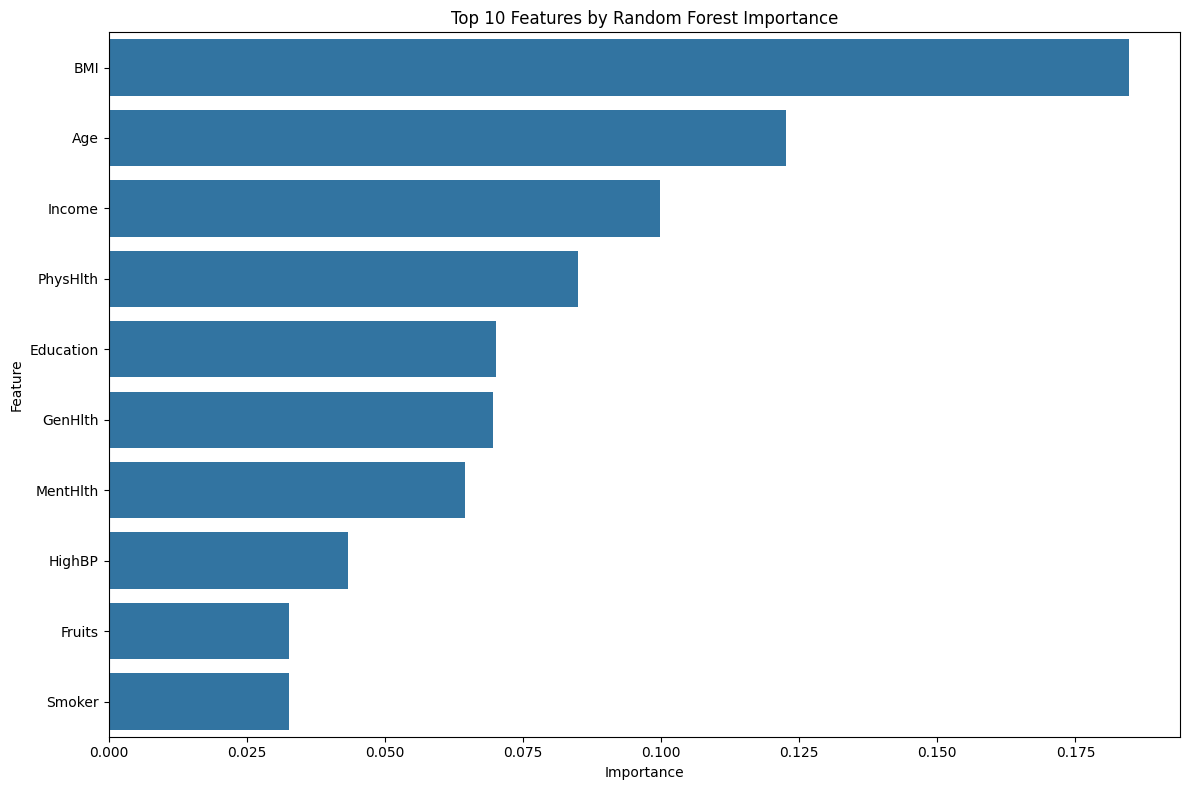

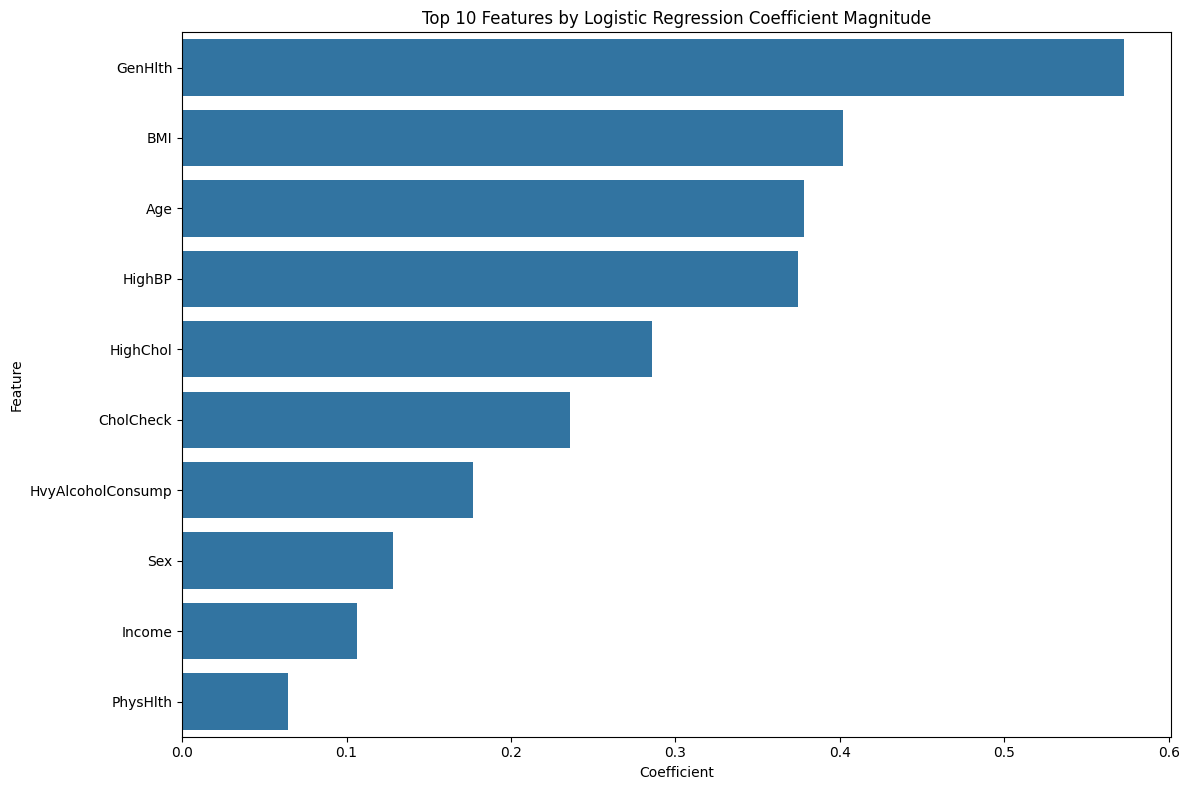

Feature descriptions (based on column names):
BMI: Body Mass Index
Age: Age Category
Income: Income Level
PhysHlth: Physical Health
Education: Education Level
GenHlth: General Health
MentHlth: Mental Health
HighBP: High Blood Pressure
Fruits: Fruit Consumption
Smoker: Smoking Status
done


In [1]:
# Let's simplify our approach and focus on feature importance without grid search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('cdc_diabetes_health_indicators.csv')

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\
First few rows:")
print(df.head())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum().sum())

# Prepare the data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Get column names for later reference
feature_names = X.columns

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a simpler Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_scaled, y)

# Get feature importances from Random Forest
rf_importances = rf.feature_importances_

# Train a simpler Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_scaled, y)

# Get coefficients from Logistic Regression
lr_coefficients = np.abs(lr.coef_[0])  # Taking absolute values for importance

# Create DataFrames for feature importance
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values('Importance', ascending=False)

lr_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_coefficients
}).sort_values('Coefficient', ascending=False)

# Display top 10 features from Random Forest
print("\
Top 10 Features by Random Forest Importance:")
print(rf_importance_df.head(10))

# Display top 10 features from Logistic Regression
print("\
Top 10 Features by Logistic Regression Coefficient Magnitude:")
print(lr_importance_df.head(10))

# Visualize feature importance for Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10))
plt.title('Top 10 Features by Random Forest Importance')
plt.tight_layout()
plt.show()

# Visualize feature importance for Logistic Regression
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=lr_importance_df.head(10))
plt.title('Top 10 Features by Logistic Regression Coefficient Magnitude')
plt.tight_layout()
plt.show()

# Let's also understand what these features mean
print("\
Feature descriptions (based on column names):")
feature_descriptions = {
    'HighBP': 'High Blood Pressure',
    'HighChol': 'High Cholesterol',
    'CholCheck': 'Cholesterol Check',
    'BMI': 'Body Mass Index',
    'Smoker': 'Smoking Status',
    'Stroke': 'History of Stroke',
    'HeartDiseaseorAttack': 'History of Heart Disease or Attack',
    'PhysActivity': 'Physical Activity',
    'Fruits': 'Fruit Consumption',
    'Veggies': 'Vegetable Consumption',
    'HvyAlcoholConsump': 'Heavy Alcohol Consumption',
    'AnyHealthcare': 'Access to Healthcare',
    'NoDocbcCost': 'No Doctor due to Cost',
    'GenHlth': 'General Health',
    'MentHlth': 'Mental Health',
    'PhysHlth': 'Physical Health',
    'DiffWalk': 'Difficulty Walking',
    'Sex': 'Gender',
    'Age': 'Age Category',
    'Education': 'Education Level',
    'Income': 'Income Level'
}

for feature in rf_importance_df['Feature'].head(10):
    if feature in feature_descriptions:
        print(f"{feature}: {feature_descriptions[feature]}")
    else:
        print(f"{feature}: No description available")

print("done")

#### Interpretation and Public Health Implications:

##### Feature Importance Findings:

- Both models indicate that features such as BMI, Age, Income, and measures of health (e.g., General Health, Physical Health, High Blood Pressure) play significant roles in predicting diabetes risk.
- The Random Forest and Logistic Regression models largely agree on the ranking of important features, suggesting that lifestyle and socioeconomic factors (like BMI, Age, and Income) are key predictors.

##### Relation to Diabetes Risk:

- An elevated Body Mass Index (BMI) substantially increases diabetes risk, which is consistent with known links between obesity and diabetes.
- Older age is another strong predictor, pointing to cumulative risk over time.
- Socioeconomic factors (Income and Education) may reflect access to healthcare, nutrition, and lifestyle behaviors—all of which impact diabetes risk.
- Other health measures, such as blood pressure and overall health ratings, further underscore the multifactorial nature of diabetes.
  
##### Implications for Public Health and Preventive Measures:

- Intervention Targeting: Programs aimed at reducing obesity, increasing physical activity, and improving diet could be vital.
- Resource Allocation: Public health initiatives might need to prioritize populations with lower income and education, given their associated higher risks.
- Screening and Early Detection: Emphasizing routine checks for high blood pressure and cholesterol could aid in early intervention.
- Holistic Health Promotion: Since multiple aspects of health (physical, mental, general) also influence diabetes risk, a comprehensive approach that integrates lifestyle, economic, and healthcare access factors is crucial.

##### These insights suggest that tailored community-based interventions and policies addressing both lifestyle and socioeconomic disparities could be particularly effective in reducing diabetes incidence.